# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [6]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.

Все письменные выкладки в отдельном файле


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.

In [8]:
sample_size = 1000
samples_count = 50000

samples = np.random.uniform(low=0.2, high=1.5, size=(samples_count, sample_size))

# Считаем оценки
sample_1avg = samples.cumsum(axis=1) / (np.arange(sample_size) + 1)           # hat{X} 
sample_2avg = (samples**2).cumsum(axis=1) / (np.arange(sample_size) + 1)      # hat{X^2}
a = sample_1avg - np.sqrt(3*(sample_2avg - sample_1avg**2))
b = sample_1avg + np.sqrt(3*(sample_2avg - sample_1avg**2))

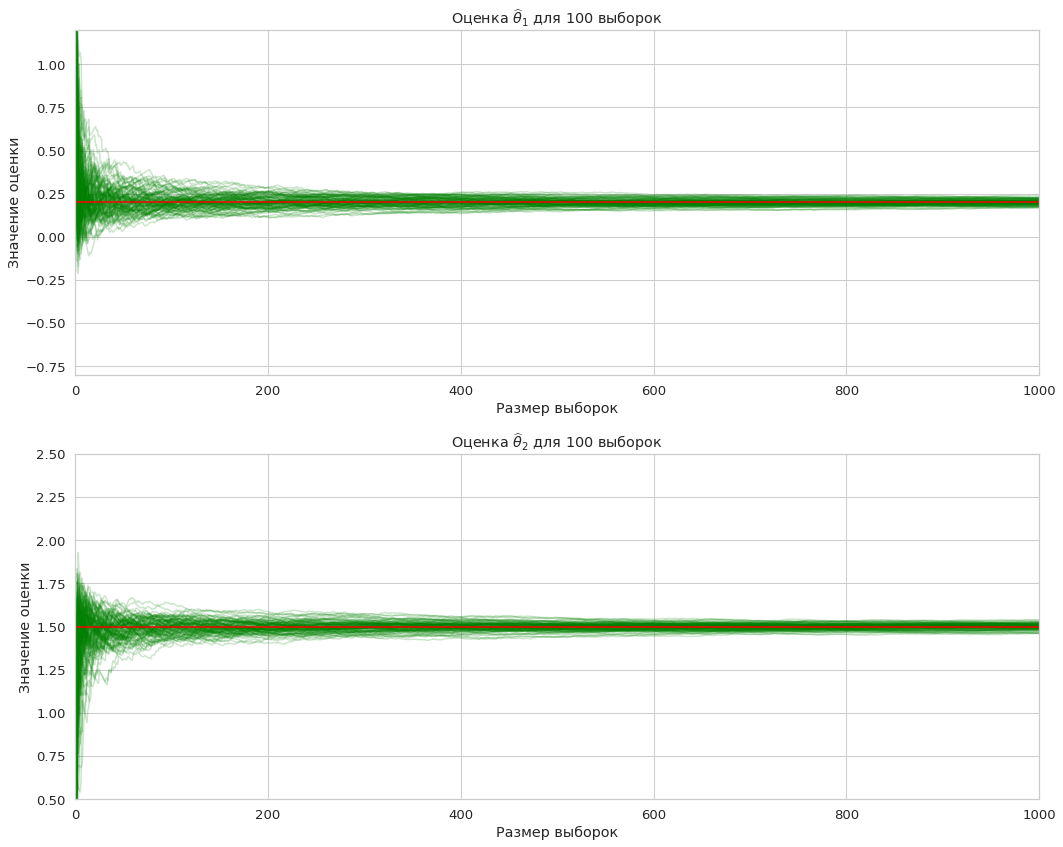

In [9]:
plt.figure(figsize=(15, 12))
true_theta = (0.2, 1.5)

for j, theta in enumerate([a, b]):
    plt.subplot(2, 1, j+1)
    
    # рисуем для каждой выборки отдельно
    for i in range(100):
        plt.plot(np.arange(sample_size) + 1, theta[i], color='green', alpha=0.2)

    plt.xlabel('Размер выборок')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $\\widehat{\\theta}_' + str(j+1) + '$ для 100 выборок')
    plt.xlim((0, sample_size))
    plt.ylim((true_theta[j]-1, true_theta[j]+1))
    plt.hlines(true_theta[j], 0, sample_size, alpha=1, color='r')

plt.tight_layout()

Как видно из вышеуказанных графиков, оценки сходятся.

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** первая оценка является смещённой, что мы доказали в предыдущей задаче, а вторая $-$ несмещённой, так как, если мы проведём те же выкладки, то получим, что матожидание оценки в точности совпадает с $\sigma^2$.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

In [ ]:
# Вначале:
plt.figure(figsize=(15, 8))

# Для каждой оценки:
# y - номер оценки
y=1
plt.scatter(theta_est, np.zeros(k), 
            alpha=0.1, s=100, color='green', label='Оценки')
plt.scatter(theta_offset, np.zeros(k)+y, 
            alpha=0.1, s=100, color='blue', label='Оценки')
plt.scatter(theta_est.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, 0, 1, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.legend()

**Решение:**

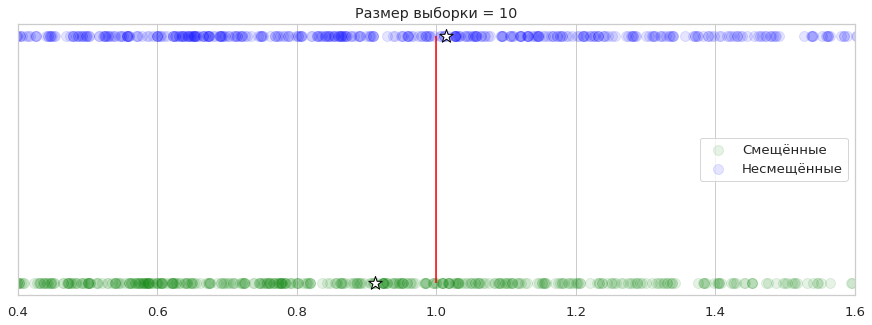

In [14]:
scale = 1
k = 500
n = 10

samples = np.random.normal(loc=0, scale=scale, size=(k, n))

theta_est = np.sum(((samples.T - np.mean(samples, axis=1)).T)**2, axis=1) / n
theta_offset = theta_est * n / (n-1)

plt.figure(figsize=(15, 5))

y=1
plt.scatter(theta_est, np.zeros(k), 
            alpha=0.1, s=100, color='green', label='Смещённые')
plt.scatter(theta_offset, np.zeros(k)+y, 
            alpha=0.1, s=100, color='blue', label='Несмещённые')
plt.scatter(theta_est.mean(), 0, marker='*', s=200, 
            color='w', edgecolors='black')
plt.scatter(theta_offset.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, 0, 1, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.xlim((0.4, 1.6))
plt.legend()

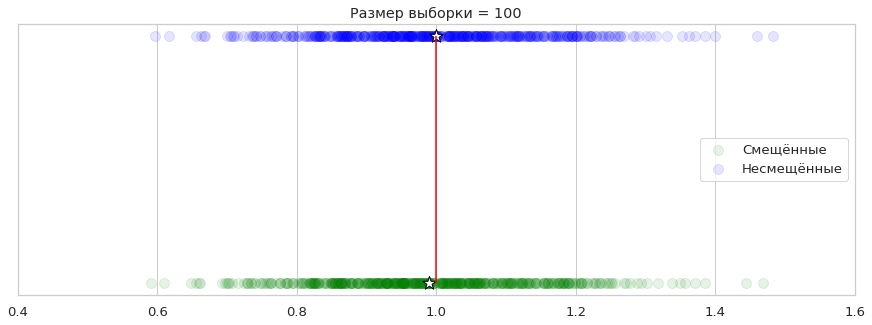

In [15]:
scale = 1
k = 500
n = 100

samples = np.random.normal(loc=0, scale=scale, size=(k, n))

theta_est = np.sum(((samples.T - np.mean(samples, axis=1)).T)**2, axis=1) / n
theta_offset = theta_est * n / (n-1)

plt.figure(figsize=(15, 5))

y=1
plt.scatter(theta_est, np.zeros(k), 
            alpha=0.1, s=100, color='green', label='Смещённые')
plt.scatter(theta_offset, np.zeros(k)+y, 
            alpha=0.1, s=100, color='blue', label='Несмещённые')
plt.scatter(theta_est.mean(), 0, marker='*', s=200, 
            color='w', edgecolors='black')
plt.scatter(theta_offset.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, 0, 1, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.xlim((0.4, 1.6))
plt.legend()

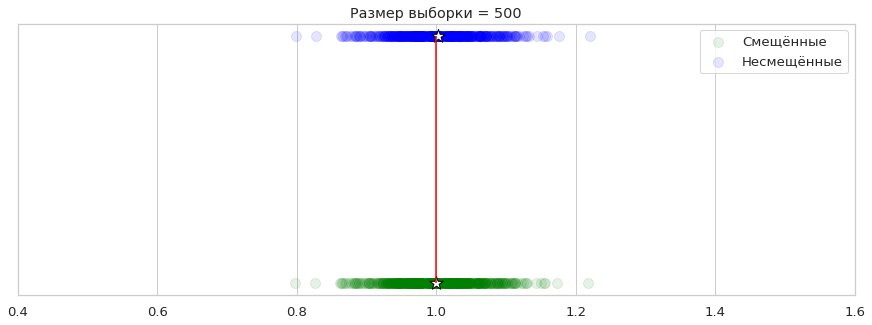

In [16]:
scale = 1
k = 500
n = 500

samples = np.random.normal(loc=0, scale=scale, size=(k, n))

theta_est = np.sum(((samples.T - np.mean(samples, axis=1)).T)**2, axis=1) / n
theta_offset = theta_est * n / (n-1)

plt.figure(figsize=(15, 5))

y=1
plt.scatter(theta_est, np.zeros(k), 
            alpha=0.1, s=100, color='green', label='Смещённые')
plt.scatter(theta_offset, np.zeros(k)+y, 
            alpha=0.1, s=100, color='blue', label='Несмещённые')
plt.scatter(theta_est.mean(), 0, marker='*', s=200, 
            color='w', edgecolors='black')
plt.scatter(theta_offset.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, 0, 1, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.xlim((0.4, 1.6))
plt.legend()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

In [ ]:
...

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

Оценка считается несмещенной, если математическое ожидание оценки совпадает с оцениваемой величиной, то бишь среднее значение оценки должно быть равно истинному значению оцениваемой величины. 

Мы можем увидеть, что в среднее несмещённой оценки ближе к истинному нежели у оценок смещённых. 

В лабораторных по физике множитель $\frac{1}{n}$ может занижать погрешности, это корректируется использованием множителя $\frac{1}{n-1}$, который делает оценку несмещённой.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.